In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("bank.csv")

In [7]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


In [8]:
df["job"].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [9]:
df.shape

(4521, 17)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   int64 
dtypes: int64(8), object(9)
memory usage: 600.6+ KB


In [11]:
df["y"].value_counts()

0    4000
1     521
Name: y, dtype: int64

In [12]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='y', ylabel='count'>

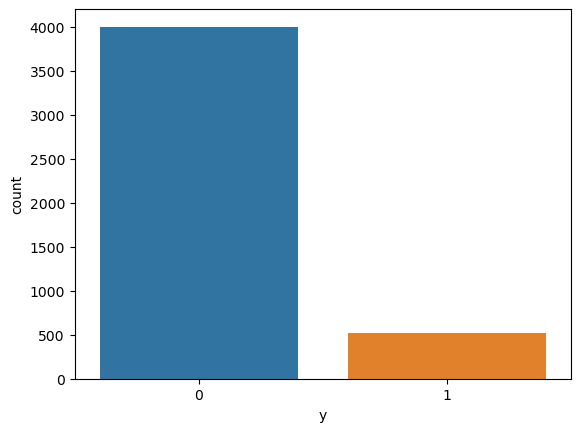

In [13]:
sns.countplot(df["y"])

# Закодируем переменные default, loan and housing с помощью словаря

In [14]:
d = {"no": 0, "yes": 1}

In [15]:
df["default"] = df["default"].map(d)
df["loan"] = df["loan"].map(d)
df["housing"] = df["housing"].map(d)



In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   int64 
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   int64 
 7   loan       4521 non-null   int64 
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   int64 
dtypes: int64(11), object(6)
memory usage: 600.6+ KB


# One-hot-encoding

In [17]:
df_cat_dummies = pd.get_dummies(df.select_dtypes("object"))

In [18]:
df_cat_dummies.shape

(4521, 38)

In [19]:
df_all = pd.concat([df_cat_dummies, df.select_dtypes("int64")], axis = 1)

In [20]:
df_all.shape

(4521, 49)

In [21]:
df_all.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,0,0,0,0,0,0,0,0,0,0,...,0,1787,0,0,19,79,1,-1,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,4789,1,1,11,220,1,339,4,0
2,0,0,0,0,1,0,0,0,0,0,...,0,1350,1,0,16,185,1,330,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,1476,1,1,3,199,4,-1,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,5,226,1,-1,0,0


In [22]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# Спрогнозируем переменную y

In [23]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import classification_report

In [24]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [25]:
X = df_all.drop("y", axis = 1)
y = df_all["y"]

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)

In [27]:
xgb_cls = XGBClassifier()

In [28]:
xgb_cls.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [29]:
y_pred = xgb_cls.predict(x_test)

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1201
           1       0.55      0.43      0.48       156

    accuracy                           0.89      1357
   macro avg       0.74      0.69      0.71      1357
weighted avg       0.88      0.89      0.89      1357



<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

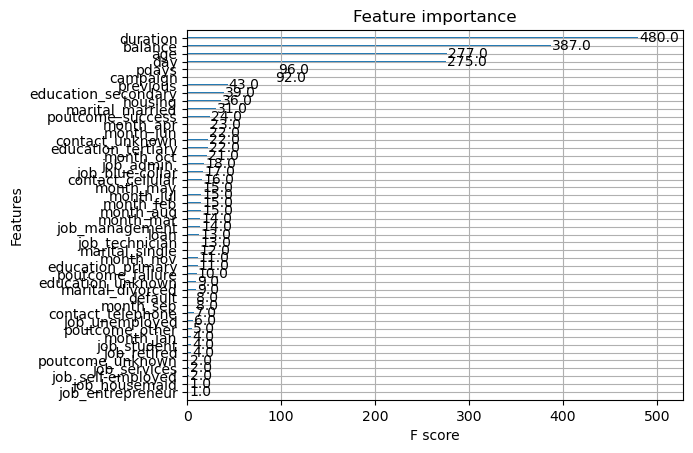

In [31]:

plot_importance(xgb_cls, )

In [32]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [33]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [34]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [35]:
X_over, Y_over = RandomOverSampler(random_state=1).fit_resample(X,y)

In [36]:
X_over.shape, Y_over.shape

((8000, 48), (8000,))

In [37]:
pd.Series(Y_over).value_counts()

0    4000
1    4000
Name: y, dtype: int64

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X_over, Y_over, test_size = 0.3, random_state = 1)

In [39]:
xgb_cls = XGBClassifier(random_state=100, learningrate=2, max_depth=10)

In [40]:
xgb_cls.fit(x_train, y_train)

[21:21:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "learningrate" } are not used.



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              learningrate=2, max_bin=256, max_cat_threshold=64,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=10, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto', ...)

In [41]:
y_pred = xgb_cls.predict(x_test)

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1209
           1       0.93      1.00      0.97      1191

    accuracy                           0.96      2400
   macro avg       0.97      0.96      0.96      2400
weighted avg       0.97      0.96      0.96      2400



<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

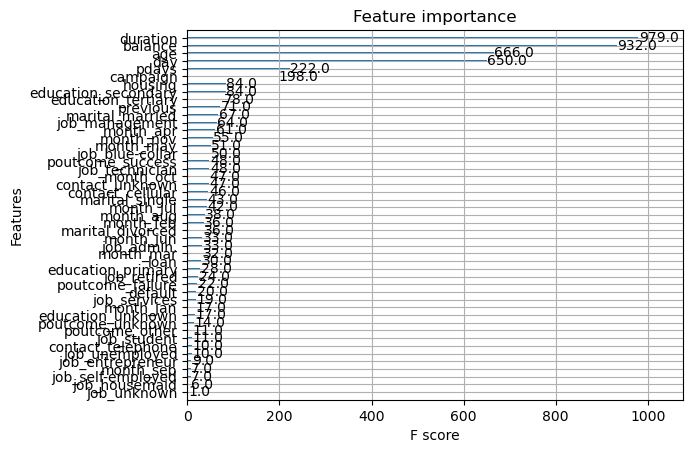

In [43]:
plot_importance(xgb_cls)

# Lightgbm

In [44]:
pip install Lightgbm

Note: you may need to restart the kernel to use updated packages.


In [45]:
from lightgbm import LGBMClassifier

In [46]:
lgbm = LGBMClassifier(n_estimators=1000, learning_rate=1, random_state=1)

In [47]:
lgbm.fit(x_train, y_train)

LGBMClassifier(learning_rate=1, n_estimators=1000, random_state=1)

In [48]:
y_pred = lgbm.predict(x_test)

In [49]:
print(classification_report(y_test, y_pred)) #плохо(

              precision    recall  f1-score   support

           0       0.61      0.80      0.69      1209
           1       0.70      0.48      0.57      1191

    accuracy                           0.64      2400
   macro avg       0.66      0.64      0.63      2400
weighted avg       0.66      0.64      0.63      2400

